In [1]:
# import modules
import csv
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#set path for dataframe to build boxplot

regional_data_path = "./happiness2016.csv"

regional_df = pd.read_csv(regional_data_path)

regional_df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [3]:
#define my variables and create a list and identify unique regions

country_whisker_df = regional_df[['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)']]

#country_whisker_df["Region"].unique()

country_whisker_df.head()

,Country,Region,Happiness Score,Economy (GDP per Capita)
0,Denmark,Western Europe,7.526,1.44178
1,Switzerland,Western Europe,7.509,1.52733
2,Iceland,Western Europe,7.501,1.42666
3,Norway,Western Europe,7.498,1.57744
4,Finland,Western Europe,7.413,1.40598


In [4]:
#create seperate DFs based on region

western_europe_region = country_whisker_df.loc[country_whisker_df["Region"] == "Western Europe"]
western_europe_whisker = western_europe_region['Happiness Score']

subsaharan_africa_region = country_whisker_df.loc[country_whisker_df["Region"] == "Sub-Saharan Africa"]
subsaharan_whisker = subsaharan_africa_region['Happiness Score']

middle_east_region = country_whisker_df.loc[country_whisker_df["Region"] == "Middle East and Northern Africa"]
middle_east_whisker = middle_east_region['Happiness Score']

southeastern_asia_region = country_whisker_df.loc[country_whisker_df["Region"] == "Southeastern Asia"]
southeastern_asia_whisker = southeastern_asia_region['Happiness Score']

southern_asia_region = country_whisker_df.loc[country_whisker_df["Region"] == "Southern Asia"]
southern_asia_whisker = southern_asia_region['Happiness Score']

latin_america_region = country_whisker_df.loc[country_whisker_df["Region"] == "Latin America and Caribbean"]
latin_america_whisker = latin_america_region['Happiness Score']

central_europe_region = country_whisker_df.loc[country_whisker_df["Region"] == "Central and Eastern Europe"]
central_europe_whisker = central_europe_region['Happiness Score']

western_europe_region = country_whisker_df.loc[country_whisker_df["Region"] == "Western Europe"]
western_europe_whisker = western_europe_region['Happiness Score']

north_american_region = country_whisker_df.loc[country_whisker_df["Region"] == "North America"]
north_american_whisker = north_american_region['Happiness Score']

austrailian_region = country_whisker_df.loc[country_whisker_df["Region"] == "Australia and New Zealand"]
austrailian_whisker = austrailian_region['Happiness Score']

whisker_data = [western_europe_whisker, subsaharan_whisker, middle_east_whisker,
               southeastern_asia_whisker, southern_asia_whisker, latin_america_whisker,
               central_europe_whisker, western_europe_whisker, north_american_whisker,
               austrailian_whisker]

labels = ["Western Europe", "Sub-Saharan Africa", "Middle East and Northern Africa", 
         "Southeastern Asia", "Southern Asia", "Latin America and Caribbean",
          "Central and Eastern Europe", "Western Europe", "North America",
          "Australia and New Zealand"]


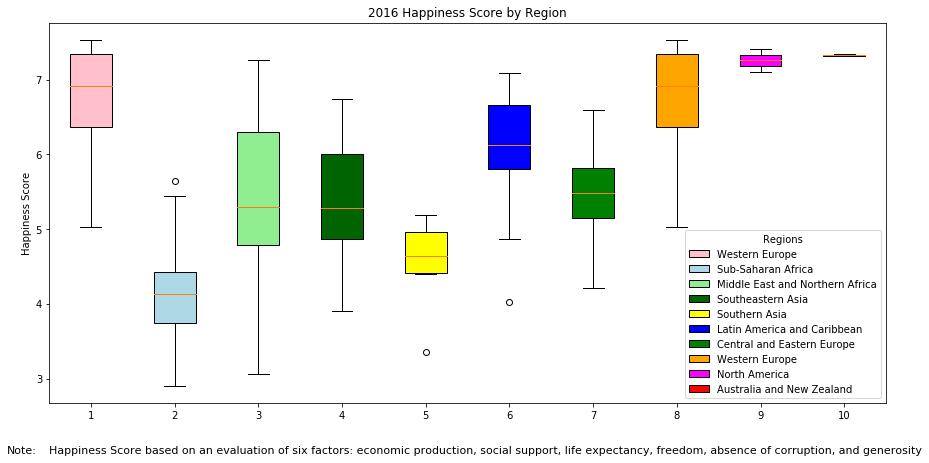

In [5]:
#boxplot by region to study regional trends in happiness

# Create a figure instance
fig = plt.figure(1, figsize=(15, 7))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(whisker_data, patch_artist=True)

#define axis labels and Title
plt.title("2016 Happiness Score by Region")
plt.ylabel("Happiness Score")


# fill with colors
colors = ['pink', 'lightblue', 'lightgreen', 'darkgreen', 'yellow', 'blue', 'green', 'orange', 'magenta', 'red']
for bplot in (bp):
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        
#GOTO figure out how to get my legend points w        
legend = plt.legend(title=("Regions"), handles=bp['boxes'],
                   labels=labels)

#ax.legend(bp['boxes'])

plt.text(0, 2, 'Note:', fontsize=11)
plt.text(0.5, 2, 'Happiness Score based on an evaluation of six factors: economic production, social support, life expectancy, freedom, absence of corruption, and generosity', fontsize=11)


# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
